# Statistics & AB Testing: Product Features

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

df = pd.read_csv('experiment_dataset.csv')

Check for Data Quality

In [ ]:
#df.head()
#print(df.isna().mean())
#df.describe()
#df.columns.to_list()
#df.drop('Unnamed: 0', axis = 1)
#print(df.info())



1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

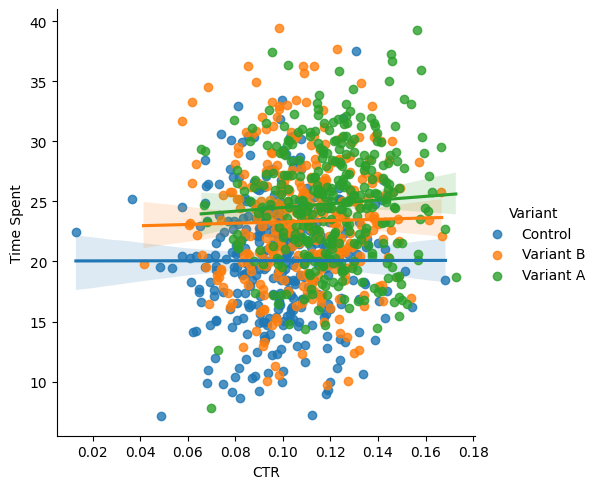

In [ ]:
# print(df['Variant'].unique())

va_t = df[df['Variant'] == 'Variant A']['Time Spent']
vb_t = df[df['Variant'] == 'Variant B']['Time Spent']
c_t = df[df['Variant'] == 'Control']['Time Spent']

sns.lmplot(data = df, x='CTR', y='Time Spent', hue = 'Variant')
plt.show()

In [ ]:
print("Time Spent Means by Variant")       
print('Variant A: ', round(va_t.mean(), 2))
print('Variant B: ', round(vb_t.mean(),2))
print('Control:', round(c_t.mean(), 2),"\n")

print("Time Spent Variance by Variant")       
print('Variant A: ', round(va_t.var(), 2))
print('Variant B: ', round(vb_t.var(),2))
print('Control:', round(c_t.var(), 2))

Time Spent Means by Variant
Variant A:  24.81
Variant B:  23.34
Control: 20.07 

Time Spent Variance by Variant
Variant A:  24.64
Variant B:  27.46
Control: 26.26


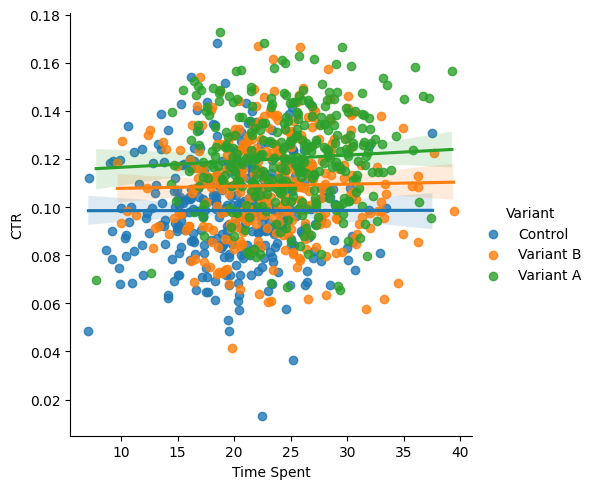

In [ ]:
va_c = df[df['Variant'] == 'Variant A']['CTR']
vb_c = df[df['Variant'] == 'Variant B']['CTR']
c_c = df[df['Variant'] == 'Control']['CTR']

sns.lmplot(data = df, x='Time Spent', y='CTR', hue = 'Variant')
plt.show()

In [ ]:
print("CTR Means by Variant")       
print('Variant A: ', round(va_c.mean(), 4))
print('Variant B: ', round(vb_c.mean(),4))
print('Control:', round(c_c.mean(), 4),"\n")

print("CTR Variances by Variant")       
print('Variant A: ', round(va_c.var(), 4))
print('Variant B: ', round(vb_c.var(),4))
print('Control:', round(c_c.var(), 4))

CTR Means by Variant
Variant A:  0.1203
Variant B:  0.1089
Control: 0.0986 

CTR Variances by Variant
Variant A:  0.0004
Variant B:  0.0004
Control: 0.0004


We see that the means for Variant A are higher than Variant B. Further, we see that Variant A and B means are both larger than the control. We will confirm if this is statistically significant in Part 2. As a precursor to statistical testing, we see that the variances are similar (satisfying homoscedascity). 

Let's proceed to calculating lift.  

In [ ]:
print("Average Time Spent Lift by Variant")       
print('Variant A: ', round(va_t.mean()-c_t.mean(), 4), "min or +", round((va_t.mean()-c_t.mean())/c_t.mean(), 4)*100, '%')
print('Variant B: ', round(vb_t.mean()-c_t.mean(), 4),"min or +", round((vb_t.mean()-c_t.mean())/c_t.mean(), 4)*100, '%'"\n")

print("Average CTR Lift by Variant")       
print('Variant A: ', round(va_c.mean()-c_c.mean(), 4), "or +", round((va_c.mean()-c_c.mean())/c_c.mean()*100, 2), '%')
print('Variant B: ', round(vb_c.mean()-c_c.mean(), 4), "or +", round((vb_c.mean()-c_c.mean())/c_c.mean()*100, 2), '%')

Average Time Spent Lift by Variant
Variant A:  4.7348 min or + 23.59 %
Variant B:  3.273 min or + 16.31 %

Average CTR Lift by Variant
Variant A:  0.0217 or + 22.03 %
Variant B:  0.0104 or + 10.53 %


For average time spent, Variant A results in a lift of 23.59% (4.7 min) whereas Variant B only results in 16.31% (3.2 min).
Similarly, for average CTR, Variant A results in a lift of 22.03% (0.02) whereas Variant B only results in 10.53% (0.01). 

Therefore, overall, the Variant A feature results in the most lift across both Time Spent and CTR metrics. 

2. Conduct statistical testing to determine if there is any statistically significant difference between the features and control group.

(a) Let's consider hypothesis testing with a t-test to see if there is a significant difference between the Average Time Spent of the same users in two different feature variants. We will repeat this for CTR.

The t-test assumes the following: 
 - Independence: Each data point should be independent of other data points. We have assumed this is a feature of experimental design.
 - Normality: For larger sample sizes (typically more than 30), the t-test can still be robust to departures from normality due to the Central Limit Theorem. Our data set has 1,000 observations so this condition is satisfied.
 - Homogeneity of variances (equal variances): The variances of the two groups being compared should be roughly equal. Variances were similar as per the above analysis. 

 Therefore, the t-test can be used. 

 Null hypothesis: There is no difference in Time Spent between the two feature variants or control.
 Alternative hypothesis: There is a statistically significant difference within a 95% confidence interval.

In [ ]:
t_stat, p_val = stats.ttest_ind(va_t, c_t)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 12.142363487472364
P-value: 8.488565644996449e-31


In [ ]:
t_stat, p_val = stats.ttest_ind(vb_t, c_t)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 8.174237395991806
P-value: 1.496358076285182e-15


In [ ]:
t_stat, p_val = stats.ttest_ind(va_t, vb_t)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 3.6788175394209075
P-value: 0.0002534771014765265


As p < 0.05, there is a signficant difference in the average time spent by both variants over the control; there is also a signficant difference in the variants means over each other. It appears that Variant A has a larger, average time spent lift than Variable B at 95% confidence interval as predicted in Part 1.

In [ ]:
t_stat, p_val = stats.ttest_ind(va_c, c_c)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 13.829424737499187
P-value: 1.9602781373243157e-38


In [ ]:
t_stat, p_val = stats.ttest_ind(vb_c, c_c)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 6.4718143491783255
P-value: 1.8743198199982106e-10


In [ ]:
t_stat, p_val = stats.ttest_ind(va_c, vb_c)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 7.08499696316128
P-value: 3.587180487986577e-12


Similiarly, as p < 0.05, there is a signficant difference in the average time spent by both variants over the control; there is also a signficant difference in the variants means over each other. It appears that Variant A has a larger, average CTR lift than Variable B at 95% confidence interval as predicted in Part 1.

We can use Analysis of Variances (ANOVA) tests if the means of three or more independent groups are diﬀerent. This allows us to compare Variant A, Variant B and Control groups simultaneously. The results should agree with our t-tests. 

In [ ]:
f_stat, p_val = stats.f_oneway(va_t, vb_t, c_t)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 75.60840947416146
P-value: 2.676826588910432e-31


In [ ]:
f_stat, p_val = stats.f_oneway(va_c, vb_c, c_c)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 93.58891593622702
P-value: 5.638952705781554e-38


As expected, the results from our ANOVA test are in agreement with our t-tests. The small p-value indicates strong evidence against the null hypothesis, so we can reject the null hypothesis and accept that the three mean are signficantly different.

3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

Both Variant A and Variant B result in statistically-signficant lift in the Average Time Spent and Average CTR at the 95% confidence interval. 

It is estimated for Average Time Spent, Variant A results in a lift of 23.59% (4.7 min) whereas Variant B only results in 16.31% (3.2 min).Similarly, for average CTR, Variant A results in a lift of 22.03% (0.02) whereas Variant B only results in 10.53% (0.01).

Therefore, overall, the Variant A feature results in the most lift across both Time Spent and CTR metrics and should be deployed in the rollout plan. 

4. Create a roll-out plan. How quickly will you introduce the feature to your audience?


Given that the features have been ideated, designed, developed and tested, the next step is to release the feature. 

To mitigate risk, the new feature (Variant A) should be deployed to a small group of targeted audience before making it live globally to ensure safe delivery. This will enable the front-end time to measure the impact on users while the engineers on the backend can ensure successful delivery of the feature and monitor the effect on the backend (Khandelwal, 2021). This method of controlled released can be geared towards a specific subset of users targeted by geography, pre-defined user segments or beta-testers. As the rollout is being gradually deployed, feedback should be monitored and responded to accordingly. Releases should follow sequentially to the next subset if it appears that a previous subset well-received the release.

References: 

Khandelwal, A. (2021, August 25). A step-by-step guide to feature rollout: VWO. Website. https://vwo.com/feature-rollout/ 